## Linear Regressions with Tensorflow

In [121]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Initialize Random Data 

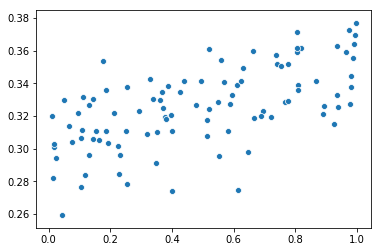

In [122]:
# create a one-dimensional array populated with random samples from a uniform distribution
x_input_data = np.random.rand(100).astype(np.float32)

# draw random samples from a normal Gaussian distribution
samples = np.random.normal(loc=0, scale=0.02, size=(len(x_input_data)))

# create y data points with random samples from a Gaussian distribution applied to it
y_input_data = (x_input_data * 0.05) + (0.3 + samples)

# visualize our target data
_ = sns.scatterplot(x=x_input_data, y=y_input_data)

## Create Weight and Bias Tensors

In [123]:
# create Tensor reference for weight to use in later computations and
# to maintain state in the graph across calls to run()
weight = tf.Variable(tf.random_uniform([1], minval=0.0, maxval=1.0))

# set the bias to [[]] for the y-intercept
bias = tf.Variable(tf.zeros([1]), dtype=tf.float32, name=None)

y = weight * x_input_data + bias

## Create Loss Function, Optimizer, Trainer and Global Tensor Variables
Loss function computes the mean of elements across dimensions of a tensor to quantify how far the prediction is from the target y values using Mean Squared Error:
$
\begin{align}
{\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}.}
\end{align}
$

In [130]:
loss = tf.reduce_mean(tf.square(y_input_data - y))

# construct a new gradient descent optimizer.
optimizer = tf.train.GradientDescentOptimizer(0.5)

# add operations to minimize loss
train = optimizer.minimize(loss)

# initializes global variables in the graph
fetches = tf.initializers.global_variables()

In [131]:
# Returns a serialized GraphDef representation of the graph for the current thread as a protocol buffer
# tf.get_default_graph().as_graph_def()

## Create the Tensorflow Session

In [126]:
# construct a Session to execute the graph
sess = tf.Session()

# execute the graph and store the value that `e` represents in `result`.
result = sess.run

# runs operations and evaluates tensors in fetches.
sess.run(fetches)
initial_y_values = sess.run(y)

## Train The Model

In [137]:
epochs = 500

# run the training for 500 epochs
for step in range(epochs):
    sess.run(train)
#     monitor the training session
#     print(f'step {step}: Weight: {sess.run([weight][0])}, Bias: {sess.run([bias][0])}')

## Plot The Results

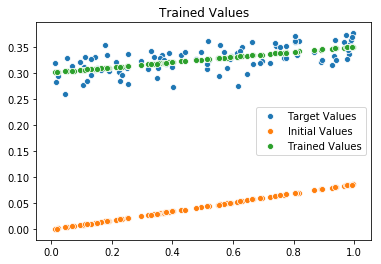

In [139]:
tgt_val = "Target Values"
plt.title(tgt_val)
sns.scatterplot(x_input_data, y_input_data)

ini_val = "Initial Values"
plt.title(ini_val)
sns.scatterplot(x_input_data, initial_y_values)

trn_val = "Trained Values"
plt.title(trn_val)
sns.scatterplot(x_input_data, sess.run(y))

_ = plt.legend(labels=[tgt_val, ini_val, trn_val])
